In [40]:
import re
from pymorphy2 import MorphAnalyzer
from nltk.corpus import stopwords

m = MorphAnalyzer()
regex = re.compile("[А-Яа-яA-z]+")

def words_only(text, regex=regex):
    try:
        return regex.findall(text.lower())
    except:
        return []

In [41]:
def my_text():
    f = open('Text4.txt.','r')
    t= f.read()
    f.close()
    return t

In [ ]:
my_text()

In [92]:
words_only(my_text())[:20]

['уильям',
 'шекспир',
 'сон',
 'в',
 'летнюю',
 'ночь',
 'пер',
 'м',
 'лозинский',
 'действующие',
 'лица',
 'тезей',
 'герцог',
 'афинский',
 'эгей',
 'отец',
 'гермии',
 'лизандр',
 'влюбленные',
 'в']

In [44]:
# The number of unique words 
counts = dict()
words = words_only(my_text())
for word in words:
    if word in counts:
        counts[word] += 1
    else:
        counts[word] = 1


In [ ]:
print(counts)

In [46]:
print(len(counts))

5148


In [47]:
# Text normalization
def lemmatize_word(token, pymorphy=m):
    return pymorphy.parse(token)[0].normal_form

def lemmatize_text(text):
    return [lemmatize_word(w) for w in text]


mystopwords = stopwords.words('russian') 
def remove_stopwords(lemmas, stopwords = mystopwords):
    return [w for w in lemmas if not w in stopwords and len(w) > 3]

def clean_text(text):
    tokens = words_only(text)
    lemmas = lemmatize_text(tokens)
    
    return remove_stopwords(lemmas)

In [91]:
clean_text(my_text())[:20]

['уильям',
 'шекспир',
 'летний',
 'ночь',
 'лозинский',
 'действовать',
 'лицо',
 'тезь',
 'герцог',
 'афинский',
 'эгей',
 'отец',
 'гермия',
 'лизандра',
 'влюбить',
 'гермия',
 'деметрия',
 'филострата',
 'распорядитель',
 'празднество']

In [ ]:
# The number of unique lems
lem_counts = dict()
lem_words = clean_text(my_text())
for word in words:
    if word in counts:
        counts[word] += 1
    else:
        counts[word] = 1

In [ ]:
print(counts)

In [90]:
print(len(counts))

3156


WordCloud

In [55]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [ ]:
words = words_only(my_text())
mystopwords = stopwords.words('russian') 
def remove_stopwords(words = words, stopwords = mystopwords):
    return [w for w in words if not w in stopwords and len(w) > 3]
    

In [84]:
remove_stopwords()[:20]

['уильям',
 'шекспир',
 'летнюю',
 'ночь',
 'лозинский',
 'действующие',
 'лица',
 'тезей',
 'герцог',
 'афинский',
 'эгей',
 'отец',
 'гермии',
 'лизандр',
 'влюбленные',
 'гермию',
 'деметрий',
 'филострат',
 'распорядитель',
 'празднеств']

In [78]:
n_text = ' '.join(remove_stopwords())

In [ ]:
n_text

In [81]:
cloud_Shakespeare = WordCloud().generate(n_text)

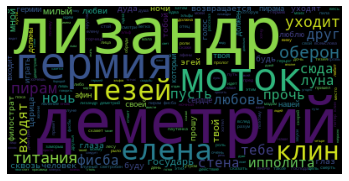

In [82]:
plt.imshow(cloud_Shakespeare)
plt.axis('off')
plt.show()